In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('KTM NEW Data.xlsx')

In [3]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [4]:
df.drop('ID', axis=1, inplace=True)

In [5]:
df.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [7]:
for i in df.columns:
    if df[i].dtype == object:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
        

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,1,0,0,1,1,0
1,27,0,1,2,4,3,1
2,39,0,3,0,1,2,0
3,20,0,3,1,4,2,0
4,29,1,2,0,1,1,1


In [10]:
x = df.drop('Response', axis =1)

In [11]:
y = df[['Response']]

In [12]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=50)

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

In [53]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [54]:
knn_pred = knn.predict(x_test)

In [55]:
accuracy_score(y_test, knn_pred)

0.7521929824561403

# Scree plot

In [56]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    error_rate.append(1-accuracy_score(y_test, knn_pred))

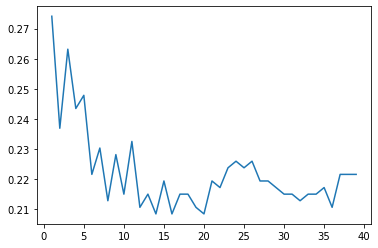

In [57]:
plt.plot(range(1,40),error_rate)